In [1]:
import pandas as pd

In [2]:
score = pd.read_csv('./Data/Analysis/scoring_result.csv')
score = score.drop(columns=['Unnamed: 0', 'index'])
score

,full_name,final_score,skill_score,degree_score,experience_score
0,Firda Devi,82.500000,187,2,2.0
1,Sandy Utama,74.722222,152,2,2.0
2,Zein Himami,66.527778,91,2,3.0
3,Anthony Jaya,64.861111,112,1,3.0
4,Muhamad Hatab,63.958333,156,1,1.5
...,...,...,...,...,...
95,Kevin Jonathan,7.500000,0,1,0.0
96,Salsabila Yasmin,7.500000,0,1,0.0
97,Lalu Pratama,7.500000,0,1,0.0
98,Sherin Sari,7.500000,0,1,0.0


In [3]:
score['normalized_skill_score'] = score['skill_score'].apply(lambda x: min(x / 180, 1)) * 55
score['normalized_exp_score'] = (score['experience_score'] / 4) * 35
score['normalized_degree_score'] = (score['degree_score'] / 2) * 10
score

,full_name,final_score,skill_score,degree_score,experience_score,normalized_skill_score,normalized_exp_score,normalized_degree_score
0,Firda Devi,82.500000,187,2,2.0,55.000000,17.500,10.0
1,Sandy Utama,74.722222,152,2,2.0,46.444444,17.500,10.0
2,Zein Himami,66.527778,91,2,3.0,27.805556,26.250,10.0
3,Anthony Jaya,64.861111,112,1,3.0,34.222222,26.250,5.0
4,Muhamad Hatab,63.958333,156,1,1.5,47.666667,13.125,5.0
...,...,...,...,...,...,...,...,...
95,Kevin Jonathan,7.500000,0,1,0.0,0.000000,0.000,5.0
96,Salsabila Yasmin,7.500000,0,1,0.0,0.000000,0.000,5.0
97,Lalu Pratama,7.500000,0,1,0.0,0.000000,0.000,5.0
98,Sherin Sari,7.500000,0,1,0.0,0.000000,0.000,5.0


In [4]:
from sklearn.preprocessing import StandardScaler
#features = score[['skill_score', 'degree_score', 'experience_score']]
#features = score[['final_score','skill_score', 'degree_score', 'experience_score']]
#features = score[['final_score', 'skill_score', 'experience_score']]
features = score[['final_score', 'normalized_skill_score', 'normalized_exp_score', 'normalized_degree_score']]
#features = score[['normalized_skill_score', 'normalized_exp_score', 'normalized_degree_score']]

In [5]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features, columns = features.columns)
scaled_features

,final_score,normalized_skill_score,normalized_exp_score,normalized_degree_score
0,2.776918,2.798521,0.341613,1.542199
1,2.273381,2.140045,0.341613,1.542199
2,1.742868,0.705509,1.264891,1.542199
3,1.634967,1.199366,1.264891,-0.210300
4,1.576521,2.234113,-0.120026,-0.210300
...,...,...,...,...
95,-2.078620,-1.434536,-1.504943,-0.210300
96,-2.078620,-1.434536,-1.504943,-0.210300
97,-2.078620,-1.434536,-1.504943,-0.210300
98,-2.078620,-1.434536,-1.504943,-0.210300


C:\Users\bangg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bangg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bangg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bangg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

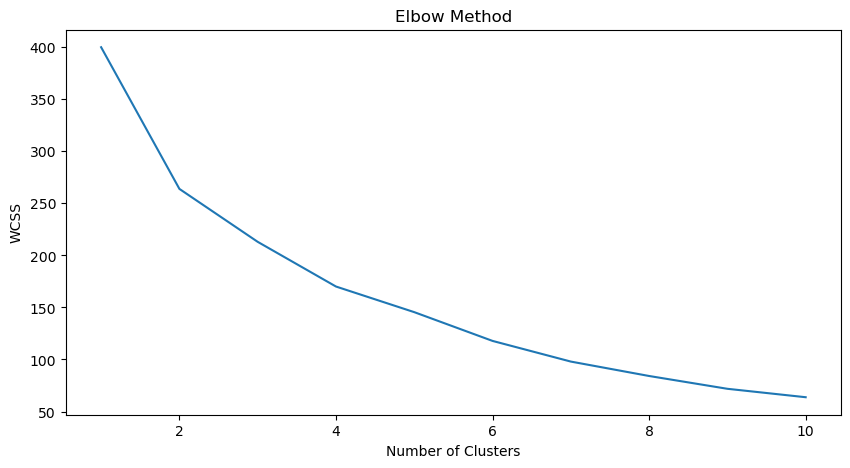

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (10,5))
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\bangg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bangg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bangg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\bangg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

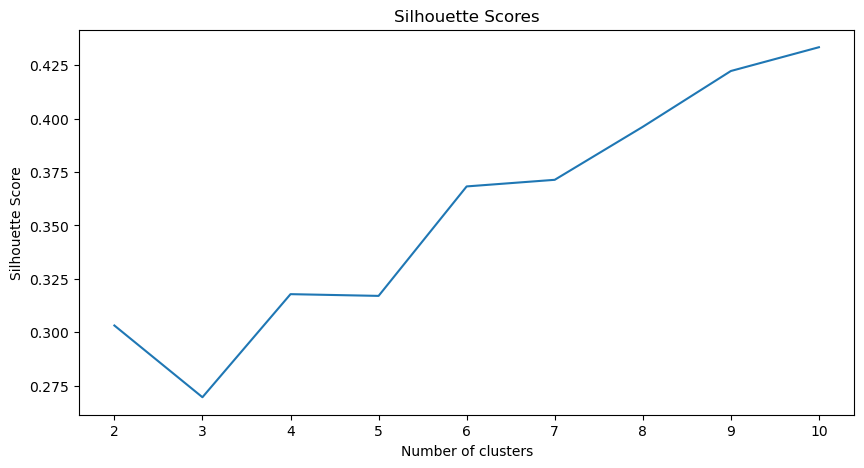

In [7]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [8]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

C:\Users\bangg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
score['Cluster'] = cluster_labels
score.head()

,full_name,final_score,skill_score,degree_score,experience_score,normalized_skill_score,normalized_exp_score,normalized_degree_score,Cluster
0,Firda Devi,82.500000,187,2,2.0,55.000000,17.500,10.0,2
1,Sandy Utama,74.722222,152,2,2.0,46.444444,17.500,10.0,2
2,Zein Himami,66.527778,91,2,3.0,27.805556,26.250,10.0,2
3,Anthony Jaya,64.861111,112,1,3.0,34.222222,26.250,5.0,2
4,Muhamad Hatab,63.958333,156,1,1.5,47.666667,13.125,5.0,2


In [10]:
#!pip install scikit-learn-extra

C:\Users\bangg\AppData\Local\Temp\ipykernel_14256\1548438754.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {int(cluster_num)}', cmap='viridis', marker='o', edgecolor='k', s=50)


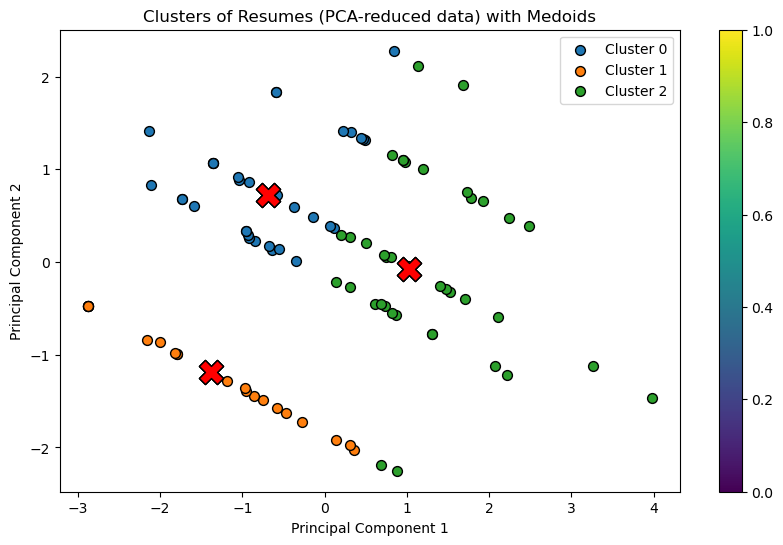

In [11]:
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization purposes
pca_features = pca.fit_transform(scaled_features)

pca_features_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])

kmedoids = KMedoids(n_clusters=optimal_clusters, init='k-medoids++', max_iter=300, random_state=42)
cluster_labels = kmedoids.fit_predict(pca_features_df)

pca_features_df['Cluster'] = cluster_labels

medoids = kmedoids.cluster_centers_

plt.figure(figsize=(10, 6))

for cluster_num in sorted(pca_features_df['Cluster'].unique()):
    cluster_data = pca_features_df[pca_features_df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {int(cluster_num)}', cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.scatter(medoids[:, 0], medoids[:, 1], s=300, c='red', marker='X', edgecolor='k')  # Medoids

plt.title('Clusters of Resumes (PCA-reduced data) with Medoids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.legend() 
plt.show()

In [12]:
score.head(50)

,full_name,final_score,skill_score,degree_score,experience_score,normalized_skill_score,normalized_exp_score,normalized_degree_score,Cluster
0,Firda Devi,82.500000,187,2,2.0,55.000000,17.500,10.0,2
1,Sandy Utama,74.722222,152,2,2.0,46.444444,17.500,10.0,2
2,Zein Himami,66.527778,91,2,3.0,27.805556,26.250,10.0,2
3,Anthony Jaya,64.861111,112,1,3.0,34.222222,26.250,5.0,2
4,Muhamad Hatab,63.958333,156,1,1.5,47.666667,13.125,5.0,2
5,Alfa Rabi,63.055556,137,1,2.0,41.861111,17.500,5.0,2
6,Irfan Amal,61.458333,120,2,1.5,36.666667,13.125,10.0,2
7,Putri Mukhlashin,60.416667,69,2,3.0,21.083333,26.250,10.0,2
8,Jordi Hasianta,59.861111,94,1,3.0,28.722222,26.250,5.0,2
9,Sa'dan,58.611111,121,1,2.0,36.972222,17.500,5.0,2


In [13]:
cluster_mapping = {2: 'Employable', 1: 'Less Employable', 0: 'Not Employable'}
score['Cluster'] = score['Cluster'].map(cluster_mapping)

In [14]:
score

,full_name,final_score,skill_score,degree_score,experience_score,normalized_skill_score,normalized_exp_score,normalized_degree_score,Cluster
0,Firda Devi,82.500000,187,2,2.0,55.000000,17.500,10.0,Employable
1,Sandy Utama,74.722222,152,2,2.0,46.444444,17.500,10.0,Employable
2,Zein Himami,66.527778,91,2,3.0,27.805556,26.250,10.0,Employable
3,Anthony Jaya,64.861111,112,1,3.0,34.222222,26.250,5.0,Employable
4,Muhamad Hatab,63.958333,156,1,1.5,47.666667,13.125,5.0,Employable
...,...,...,...,...,...,...,...,...,...
95,Kevin Jonathan,7.500000,0,1,0.0,0.000000,0.000,5.0,Not Employable
96,Salsabila Yasmin,7.500000,0,1,0.0,0.000000,0.000,5.0,Not Employable
97,Lalu Pratama,7.500000,0,1,0.0,0.000000,0.000,5.0,Not Employable
98,Sherin Sari,7.500000,0,1,0.0,0.000000,0.000,5.0,Not Employable


# Modelling

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, roc_curve, roc_auc_score, 
                             classification_report, confusion_matrix, 
                             ConfusionMatrixDisplay, precision_recall_curve)
from sklearn.ensemble import RandomForestClassifier

In [16]:
score = score[['full_name', 'normalized_skill_score', 'normalized_exp_score', 'normalized_degree_score', 'Cluster']]

In [17]:
# Preprocess the data
data_modelling = pd.get_dummies(score, columns=['Cluster'],dtype='int')
data_modelling

,full_name,normalized_skill_score,normalized_exp_score,normalized_degree_score,Cluster_Employable,Cluster_Less Employable,Cluster_Not Employable
0,Firda Devi,55.000000,17.500,10.0,1,0,0
1,Sandy Utama,46.444444,17.500,10.0,1,0,0
2,Zein Himami,27.805556,26.250,10.0,1,0,0
3,Anthony Jaya,34.222222,26.250,5.0,1,0,0
4,Muhamad Hatab,47.666667,13.125,5.0,1,0,0
...,...,...,...,...,...,...,...
95,Kevin Jonathan,0.000000,0.000,5.0,0,0,1
96,Salsabila Yasmin,0.000000,0.000,5.0,0,0,1
97,Lalu Pratama,0.000000,0.000,5.0,0,0,1
98,Sherin Sari,0.000000,0.000,5.0,0,0,1


In [18]:
from sklearn.model_selection import train_test_split

X = score.drop(columns=['Cluster', 'full_name'])
y = score['Cluster'] 



In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [20]:
# Logistic Regression Model
model = LogisticRegression(solver='newton-cholesky')
model.fit(X_train, y_train)

# Predictions and Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Model Accuracy:", accuracy)

Logistic Regression Model Accuracy: 1.0


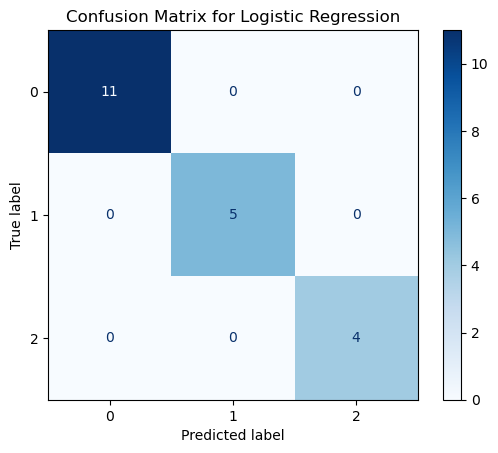

In [21]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [22]:
report = classification_report(y_test, y_pred)
print("\nLogistic Regression Classification Report:\n", report)


Logistic Regression Classification Report:
                  precision    recall  f1-score   support

     Employable       1.00      1.00      1.00        11
Less Employable       1.00      1.00      1.00         5
 Not Employable       1.00      1.00      1.00         4

       accuracy                           1.00        20
      macro avg       1.00      1.00      1.00        20
   weighted avg       1.00      1.00      1.00        20



In [28]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=2024)
rf_model.fit(X_train, y_train)

# Predictions and Accuracy for Random Forest
y_pred_rf = rf_model.predict(X_train)
y_pred_prob_rf = rf_model.predict_proba(X_train)[:, 1]
accuracy_rf = accuracy_score(y_train, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

Random Forest Accuracy: 1.00


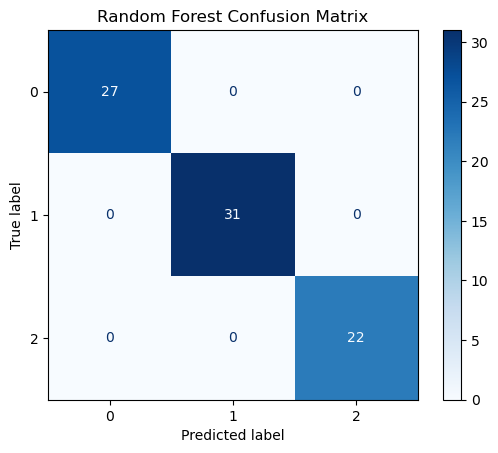

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_train, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.show()

In [25]:
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
                  precision    recall  f1-score   support

     Employable       1.00      1.00      1.00        11
Less Employable       1.00      1.00      1.00         5
 Not Employable       1.00      1.00      1.00         4

       accuracy                           1.00        20
      macro avg       1.00      1.00      1.00        20
   weighted avg       1.00      1.00      1.00        20



In [26]:
# Predictions and Accuracy of Best Model
y_pred_best = rf_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Accuracy of Best Random Forest Model: {accuracy_best:.2f}')
print("\nBest Random Forest Classification Report:\n", classification_report(y_test, y_pred_best))

Accuracy of Best Random Forest Model: 1.00

Best Random Forest Classification Report:
                  precision    recall  f1-score   support

     Employable       1.00      1.00      1.00        11
Less Employable       1.00      1.00      1.00         5
 Not Employable       1.00      1.00      1.00         4

       accuracy                           1.00        20
      macro avg       1.00      1.00      1.00        20
   weighted avg       1.00      1.00      1.00        20



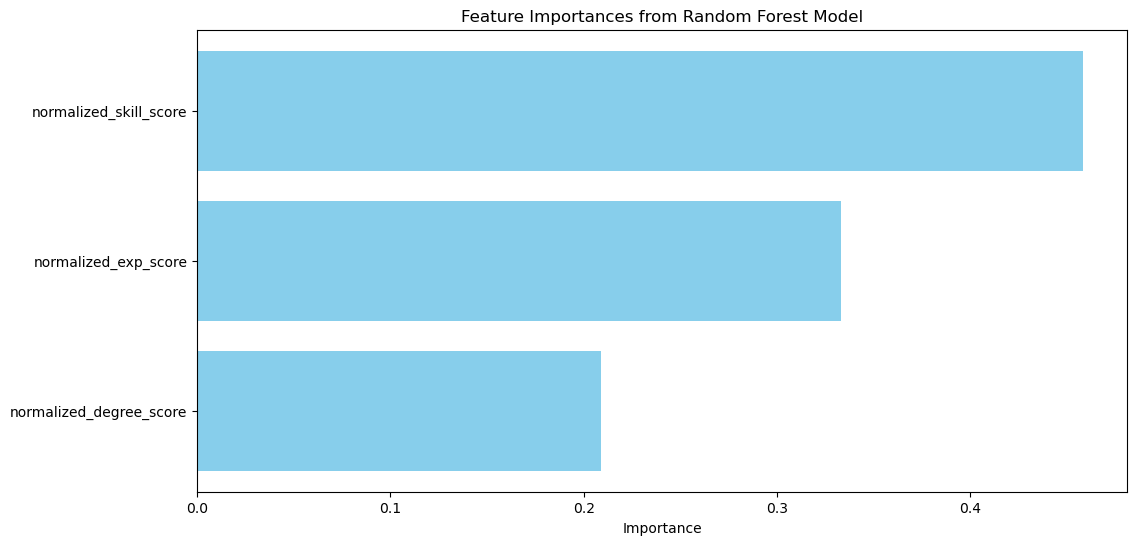

In [27]:
# Feature Importances
importances = rf_model.feature_importances_

feature_names = X.columns  # Get the feature names
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Model')
plt.gca().invert_yaxis()  
plt.show()
